# [Auto MPG Data Set](https://archive.ics.uci.edu/ml/datasets/auto+mpg)

Abstract: Revised from CMU StatLib library, data concerns city-cycle fuel consumption

**Source**: This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.


**Data Set Information**: This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)


**Attribute Information**:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)


**Relevant Papers**:

Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
[Web Link]

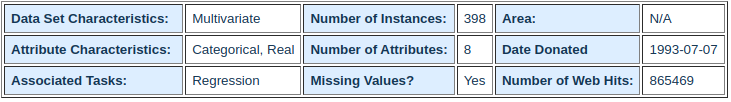

#### load modules

In [ ]:
import re                                                                       # re — Regular expression operations (docs): https://docs.python.org/3/library/re.html
import numpy as np                                                              # load numerical python (docs): https://numpy.org/doc/stable/
import pandas as pd                                                             # load pandas (docs): https://pandas.pydata.org/docs/
from matplotlib import pyplot as plt                                            # load matplotlib's pyplot (docs): https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html
import seaborn as sns                                                           # load seaborn (docs): https://seaborn.pydata.org/
# matplotlib's pyplot (tutorial) : https://matplotlib.org/stable/tutorials/introductory/pyplot.html
# seaborn (user guide and tutorial): https://seaborn.pydata.org/tutorial.html
# an introduction to seaborn: https://seaborn.pydata.org/tutorial/introduction
# example gallery (seaborn): https://seaborn.pydata.org/examples/index.html
# user guide (pandas): https://pandas.pydata.org/docs/user_guide/index.html
# pandas (docs-v2): https://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html
# 10 minutes to pandas (must read): https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

#### download data and analysis

In [ ]:
# source: https://archive.ics.uci.edu/ml/datasets/auto+mpg
!wget -O "index" "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/Index"
!wget -O "auto-mpg.data" "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
!wget -O "auto-mpg.data-original" "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original"
!wget -O "auto-mpg.names" "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names"

In [ ]:
# reading contents of "auto-mpg.data" (data file) (first few lines)
with open('auto-mpg.data',mode='r') as file_object:
  # make read first file lines using loop
  for index,line in enumerate(file_object.readlines()[:5]):
    print(f'Line {index}: {line}')
# thus seperator in file is uneven spaces ..... Also column names (header) are not given  in data file!

Line 0: 18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"

Line 1: 15.0   8   350.0      165.0      3693.      11.5   70  1	"buick skylark 320"

Line 2: 18.0   8   318.0      150.0      3436.      11.0   70  1	"plymouth satellite"

Line 3: 16.0   8   304.0      150.0      3433.      12.0   70  1	"amc rebel sst"

Line 4: 17.0   8   302.0      140.0      3449.      10.5   70  1	"ford torino"



In [ ]:
# reading contents of "auto-mpg.names" files to get column names
with open('auto-mpg.names',mode='r') as file_object:
  # reading full files to get all details
  print(file_object.read())
# Point - 7 contians column (header) names and point 8 contains information about missing values - "horsepower has 6 missing values"

1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumptio

#### read data

In [ ]:
# make list of column names (point - 7 in "auto-mpg.names" text file)
column_names:list=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
# make read data file ("auto-mpg.data")
mpg_data=pd.read_csv('auto-mpg.data',delim_whitespace=True,header=None,names=column_names)
mpg_data.head()                                                                 # see head (first five values)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


#### see dataset info and stats (describe)

See column types and statistics and search for null values

In [ ]:
# see data info
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


**As, horsepower column must be numerical but it is `object` type, thus it must contains non-numerical values.**

In [ ]:
mpg_data.isna().sum()                                                           # check for nuerical null
# NOTE: Return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values.
# Everything else gets mapped to False values. Characters such as empty strings '' or numpy.inf are not considered NA values (unless you set
# pandas.options.mode.use_inf_as_na = True). Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

Thus null values are not captured by `pandas.DataFrame.isna`, means they might be some string (because if it will be numerical than column must hold nuemrical data-type) like - "?" , "-" or " " (single space) etc.

In [ ]:
mpg_data.describe()                                                             # describe dataset (for numerical values)

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Standard deviation of each column (and also difference between the standard deviation of two column) is high. Thus, **dataset needs preprocessing like scaling or normalization**.

In [ ]:
mpg_data.describe(include=object)                                               # describe dataset (non-numerical values)

,horsepower,car_name
count,398,398
unique,94,305
top,150.0,ford pinto
freq,22,6


`horsepower` is irrelevant here. `car_name` must be label encoded because not all values are unique.

#### finding null values (in `horsepower` column)

In [ ]:
# get list of all non-numerical value # '34.8'.replace('.','',1) -> '348'.isdigit() -> True ; '34.8.7'.replace('.','',1) -> '348.7'.isdigit() -> False
non_numerical_value:list=[value for value in mpg_data.horsepower.unique() if not value.replace('.','',1).isdigit()]# get list of all numerical values
print('Non-numerical values:',non_numerical_value)                              # see list of all non-numerical value

Non-numerical values: ['?']


In [ ]:
# make replace non-numerical values in "horsepower" column with numpy.nan
mpg_data.horsepower.replace(to_replace=non_numerical_value,value=np.nan,inplace=True)
mpg_data.isna().sum()                                                           # see (check for null values)

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

Thus, total missing values 6 in `horsepower` (now detectable by pandas.DataFrame.isna)

In [ ]:
mpg_data.dtypes                                                                 # see dtype of columns

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

`horsepower` must be `float` type as contains values with decimal points.

In [ ]:
# convert "horsepower" dtype from object to float
mpg_data=mpg_data.astype({'horsepower':float})                                  # make over-write
mpg_data.dtypes                                                                 # see dtype of columns (updated)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

Make string cleaner function to clean `car_name` column. As to fill missing values in `horsepower` column need all columns in numerical form. Thus, clean `car_name` column and than label-encode it.

In [ ]:
def cleaner(value:str)->str:                                                    # make string cleaner function
  value=value.casefold()                                                        # convert to lowercase forcefully
  return re.sub('[^a-z0-9]','',value)                                           # return clean string (remove spaces also because -> we have
  # samples like 'audi 100 ls' and 'audi 100ls' in data (both are same, only the difference is of space)

In [ ]:
# make copy of dataset to store clean values
mpg_data_cleaned=mpg_data.copy()                                                # make copy of orginal dataset as cleaning will be done on copy
mpg_data_cleaned.car_name=mpg_data.car_name.apply(cleaner)                      # apply cleaner function on car_name column
mpg_data_cleaned.head()                                                         # see head of clean column

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevroletchevellemalibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buickskylark320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouthsatellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amcrebelsst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,fordtorino


Apply label encoding on `car_name` column.

In [ ]:
# make label encode car names - load encoder
from sklearn.preprocessing import LabelEncoder                                  # source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

encoder=LabelEncoder()                                                          # make label encoder object
mpg_data_cleaned.car_name=encoder.fit_transform(mpg_data_cleaned.car_name)      # make fit and transform values (return numpy array)
mpg_data_cleaned.head()                                                         # see head of dataframe (label encoded)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,47
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,34
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,227
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,13
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,157


fill missing values in `horsepower` column.

In [ ]:
# fill missing values in horsepower column using mean of column (using pandas.DataFrame.fillna method) (method - 1)
# source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
#mpg_data_cleaned.horsepower=mpg_data.horsepower.fillna(mpg_data_cleaned.horsepower.mean())# make overwrite column with filled values

In [ ]:
# using univariate feature imputation (using sklearn.impute.SimpleImputer) (method - 2)
# source: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
# source (example): https://scikit-learn.org/stable/modules/impute.html#univariate-feature-imputation
# from sklearn.impute import SimpleImputer                                        # input only numerical columns
# imputer=SimpleImputer(missing_values=np.nan,strategy='mean')                    # make object of imputer
# filled_array:np.ndarray=imputer.fit_transform(mpg_data_cleaned.drop(columns=['mpg']),mpg_data_cleaned['mpg'])# make fit and transform values (fill values)
# filled_data:pd.DataFrame=pd.DataFrame(data=filled_array,columns=mpg_data_cleaned.drop(columns=['mpg']).columns)# make dataframe from filled array
# filled_data['mpg']=mpg_data_cleaned['mpg']                                      # add "mpg" column
# filled_data.isna().sum()                                                        # check for null values (all must be zeros)

In [ ]:
# using Nearest neighbors imputation (using sklearn.impute.KNNImputer)
# source: https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html
# source (example): https://scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation
from sklearn.impute import KNNImputer                                           # call KNNImputer class

# make object of KNNImputer class
imputer=KNNImputer(missing_values=np.nan,n_neighbors=5,)
filled_array:np.array=imputer.fit_transform(mpg_data_cleaned.drop(columns=['mpg']),mpg_data_cleaned['mpg'])# make fit and transform values (fill values)
filled_data:pd.DataFrame=pd.DataFrame(data=filled_array,columns=mpg_data_cleaned.drop(columns=['mpg']).columns)# make dataframe from filled array
filled_data['mpg']=mpg_data_cleaned['mpg']                                      # add "mpg" column
filled_data.isna().sum()                                                        # check for null values (all must be zeros)

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
mpg             0
dtype: int64

#### make dictionary of different types of preprocessing with different arguments

In [ ]:
# load different preprocessing classes and functions
from sklearn.preprocessing import MinMaxScaler,StandardScaler,normalize
# source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
# source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html

preprocessing:dict={'MinMaxScaler-0':{'class':MinMaxScaler,'attributes':{'feature_range':(0,1)}},# MinMaxScaler for feature range 0 and 1
                    'MinMaxScaler-1':{'class':MinMaxScaler,'attributes':{'feature_range':(-1,1)}},# MinMaxScaler for feature range -1 and 1
                    'StandardScaler':{'class':StandardScaler,'attributes':dict()},# StandardScaler
                    'normalize-0':{'function':normalize,'attributes':{'norm':'l2','axis':1}},# normalize finction for l2 normalization for sample wise
                    'normalize-1':{'function':normalize,'attributes':{'norm':'l1','axis':1}},# normalize finction for l1 normalization for sample wise
                    'normalize-3':{'function':normalize,'attributes':{'norm':'max','axis':1}},# normalize finction for max normalization for sample wise
                    'normalize-2':{'function':normalize,'attributes':{'norm':'l2','axis':0}},# normalize finction for l2 normalization for feature wise
                    'normalize-3':{'function':normalize,'attributes':{'norm':'l1','axis':0}},# normalize finction for l1 normalization for feature wise
                    'normalize-2':{'function':normalize,'attributes':{'norm':'max','axis':0}},# normalize finction for max normalization for feature wise
                    'No-Preprocessing':{'none':'none','attributes':dict()}      # no preprocessing applied
}

#### find best model using - [Decision Tree Regressor (i.e. sklearn.tree.DecisionTreeRegressor)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) and [Grid Search CV (i.e sklearn.model_selection.GridSearchCV)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [ ]:
from sklearn.model_selection import GridSearchCV                                # load Grid Search CV class
from sklearn.tree import DecisionTreeRegressor                                  # load Decision Tree Regressor class

X:pd.DataFrame=filled_data.drop(columns='mpg')                                  # get inputs (X) as pd.DataFrame
y:pd.Series=filled_data['mpg']                                                  # get outputs (y) as pd.Series

for preprocessing_type in preprocessing:                                        # make loop to apply each preprocessing type

  if 'class' in preprocessing[preprocessing_type]:                              # object have to be made of preprocessing class (for MinMaxScaler and StandardScaler)
    class_object=preprocessing[preprocessing_type]['class'](**preprocessing[preprocessing_type]['attributes'])# make object with given arguments
    X_preprocessed:np.ndarray=class_object.fit_transform(X,y)                   # apply preprocessing on inputs (X)
  elif 'function' in preprocessing[preprocessing_type]:                         # apply function perprocessing with default arguments (for normalize)
    X_preprocessed:np.ndarray=preprocessing[preprocessing_type]['function'](X,**preprocessing[preprocessing_type]['attributes'])# make apply function with given arguments
  else:                                                                         # if no-perprocessing have to be applied
    X_preprocessed:np.ndarray=X.to_numpy()                                      # make alias for inputs (X)

  model_search=GridSearchCV(DecisionTreeRegressor(),                            # make GridSearch CV object for model search
                            # make parameter grid (dictionary), source: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
                            param_grid={'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
                                        'splitter':['best','random'],'max_depth':[None,5,10,50,100], 'min_samples_split':[2,3,7,10,20,50],},
                            cv=None,scoring='r2',verbose=0)                     # cv -> None (means 5) and scoring method -> "r2"
                            # other scoring method -> https://scikit-learn.org/stable/modules/model_evaluation.html
  model_search.fit(X_preprocessed,y)                                            # make fit model search by "GridSearchCV"
  preprocessing[preprocessing_type]['model_search_object']=model_search         # record "GridSearchCV" object to preprocessing dictionary
  # make  print info
  print(f'Preprocessing type name - {preprocessing_type} (for {preprocessing[preprocessing_type]["attributes"]}) - \n',
        f'Best score: {np.round(model_search.best_score_)} for {model_search.best_params_}')

Preprocessing type name - MinMaxScaler-0 (for {'feature_range': (0, 1)}) - 
 Best score: 1.0 for {'criterion': 'squared_error', 'max_depth': 100, 'min_samples_split': 10, 'splitter': 'random'}
Preprocessing type name - MinMaxScaler-1 (for {'feature_range': (-1, 1)}) - 
 Best score: 1.0 for {'criterion': 'friedman_mse', 'max_depth': 50, 'min_samples_split': 7, 'splitter': 'random'}
Preprocessing type name - StandardScaler (for {}) - 
 Best score: 1.0 for {'criterion': 'poisson', 'max_depth': None, 'min_samples_split': 20, 'splitter': 'random'}
Preprocessing type name - normalize-0 (for {'norm': 'l2', 'axis': 1}) - 
 Best score: 1.0 for {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 50, 'splitter': 'random'}
Preprocessing type name - normalize-1 (for {'norm': 'l1', 'axis': 1}) - 
 Best score: 1.0 for {'criterion': 'poisson', 'max_depth': None, 'min_samples_split': 7, 'splitter': 'random'}
Preprocessing type name - normalize-3 (for {'norm': 'l1', 'axis': 0}) - 
 Best

#### [plot feature importance using trees](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)

In [ ]:
# take any model made above (as all have same score - 1.0) - make plot socres (let's plot for no preprocessing)
feature_importances=pd.Series(preprocessing['No-Preprocessing']['model_search_object'].best_estimator_.feature_importances_,index=X.columns)
feature_importances                                                             # see series

cylinders       0.005822
displacement    0.659845
horsepower      0.137389
weight          0.045222
acceleration    0.016553
model_year      0.116777
origin          0.007631
car_name        0.010762
dtype: float64

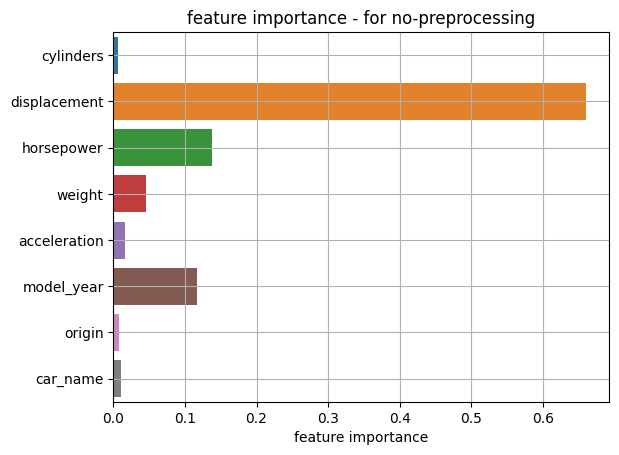

In [ ]:
# make plot feature importances
#feature_importances.plot.bar(color='red')                                       # make plot bar graph # or
sns.barplot(data=None,x=feature_importances,y=feature_importances.index)        # or by using seaborn.barplot
plt.title('feature importance - for no-preprocessing')                          # add title to plot
plt.grid(),plt.xlabel('feature importance')                                     # add x axis label and grid
plt.show()                                                                      # make show

# References / More to read at -

* dataset - https://archive.ics.uci.edu/ml/datasets/auto+mpg
* [sklearn.tree.DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
* [sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
* [Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html)
* [Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html)
* [Cross-validation: evaluating estimator performance](https://scikit-learn.org/stable/modules/cross_validation.html)
* [Feature importances with a forest of trees](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)